In [1]:
import arviz as az
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
import pymc3 as pm
import seaborn as sns
import time


In [2]:
os.getcwd()

'/Users/kevinstoltz/Documents/Projects/MCMC'

In [3]:
data_dir = Path('/Users/kevinstoltz/Documents/data_sets/Wine')


In [4]:
df = pd.read_csv(data_dir / 'winequality-red.csv')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

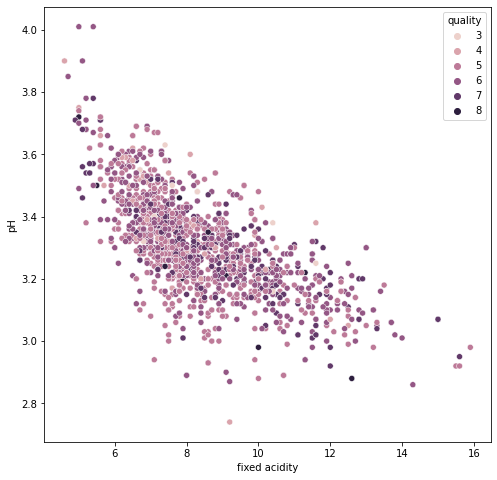

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(ax=ax, data=df, x='fixed acidity', y='pH', hue='quality')

In [7]:
X = df['fixed acidity'].to_numpy()
y = df['pH'].to_numpy()

In [8]:
len(y)

1599

# Modeling pH as a Function of Fixed Acidity


Y ~ N(alpha + beta*X, sigma^2)

    alpha ~ N(0, 100)

    beta ~ N(0, 100)

    sigma ~ |N(0, 1)|

In [9]:
sample_size = 5000

ph_model = pm.Model()

with ph_model:
    
    # set up priors
    alpha = pm.Normal("alpha", mu=0, tau=9)
    beta = pm.Normal("beta", mu=0, tau=2)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # set up model mean
    mu = alpha + beta*X
    
    # set up the model
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=y)
    
    step_mh = pm.Metropolis()
    step_nuts = pm.NUTS()
    
    samples_mh = pm.sample(draws=sample_size, step=step_mh)
    samples_nuts = pm.sample(draws=sample_size, step=step_nuts)
    


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 11000/11000 [00:05<00:00, 2188.06draws/s]
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 11000/11000 [00:23<00:00, 466.38draws/s]
The acceptance probability does not match the target. It is 0.9515433836327403, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9151881054766566, but should be close to 0.8. Try to increase the number of tuning steps.


/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

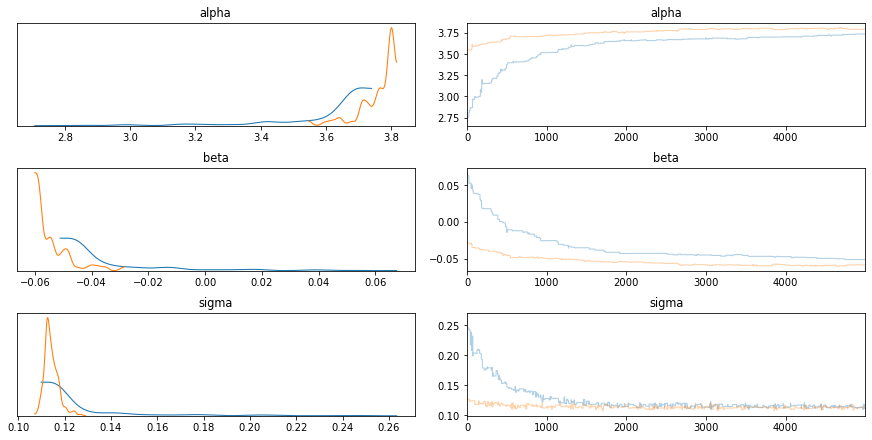

In [10]:
with ph_model:
    
    pm.traceplot(samples_mh, ['alpha', 'beta', 'sigma'])

/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

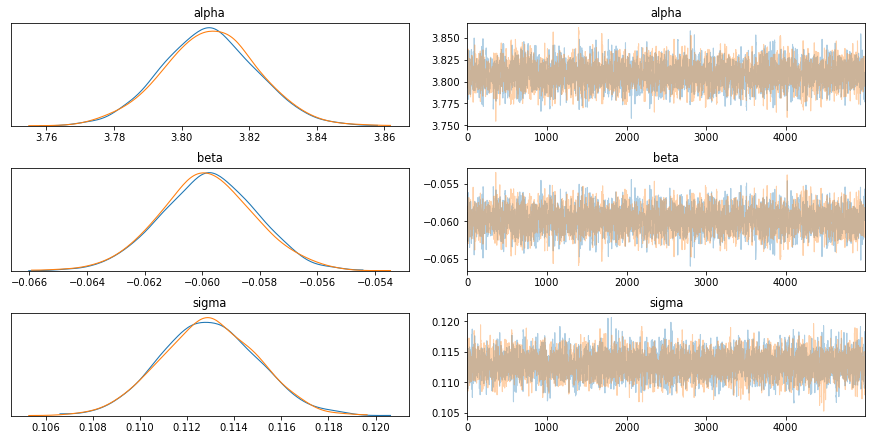

In [11]:
with ph_model:
    
    pm.traceplot(samples_nuts, ['alpha', 'beta', 'sigma'])

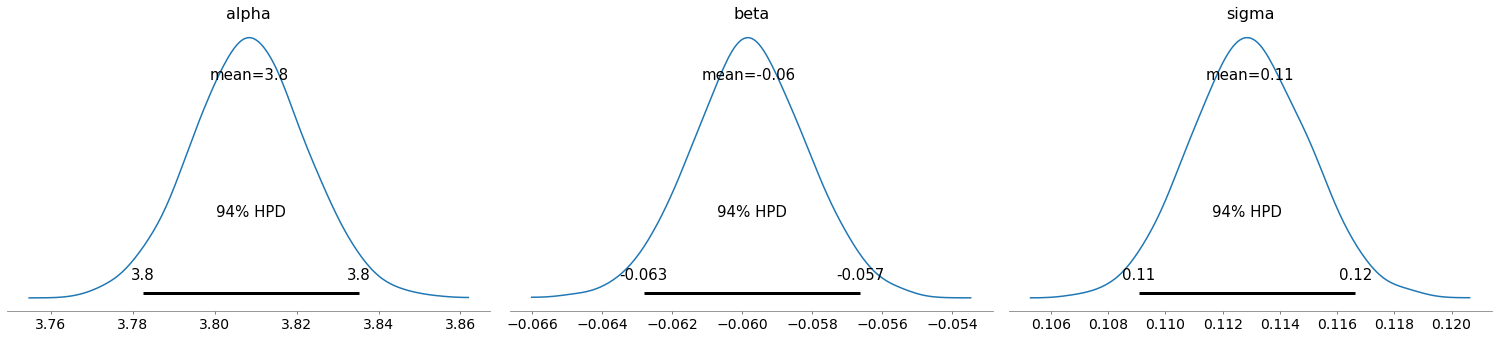

In [12]:
with ph_model:
    
    pm.plot_posterior(samples_nuts)

In [14]:
ppc = pm.sample_posterior_predictive(samples_nuts, model=ph_model)

100%|██████████| 10000/10000 [00:14<00:00, 706.44it/s]


In [16]:
ppc['Y_obs'][:,0]

array([3.52144743, 3.23384487, 3.39269931, ..., 3.32936753, 3.44527493,
       3.43909647])

In [42]:
crit_l = np.percentile(ppc["Y_obs"],q=2.5,axis=0)  # grab lower 2.5% quantiles
crit_u = np.percentile(ppc["Y_obs"],q=97.5,axis=0)  # grab Upper 97.5% quantiles
mean_spp = np.mean(ppc["Y_obs"], axis=0) # Mean

In [61]:
ppc["Y_obs"]

array([[3.55191564, 3.32165295, 3.43421868, ..., 3.68297757, 3.59248163,
        3.37845047],
       [3.2152229 , 3.31038624, 3.40091856, ..., 3.47491651, 3.72319293,
        3.41327049],
       [3.14780184, 3.46013034, 3.27449742, ..., 3.29857182, 3.63444133,
        3.31843214],
       ...,
       [3.35943207, 3.19740636, 3.32032297, ..., 3.35560875, 3.55451812,
        3.49224989],
       [3.23574822, 3.34026126, 3.22982337, ..., 3.3822986 , 3.55197323,
        3.35061838],
       [3.32355879, 3.33888969, 3.31004291, ..., 3.42911483, 3.55391135,
        3.37771088]])

In [93]:
mean_spp

array([3.3646123 , 3.34244706, 3.34268623, ..., 3.43153117, 3.45695015,
       3.44860068])

In [90]:
len(np.linspace(np.min(X), np.max(X), len(X)))

1599

In [112]:
3.8+(-0.06)*xx

array([3.524     , 3.51715152, 3.51030303, 3.50345455, 3.49660606,
       3.48975758, 3.48290909, 3.47606061, 3.46921212, 3.46236364,
       3.45551515, 3.44866667, 3.44181818, 3.4349697 , 3.42812121,
       3.42127273, 3.41442424, 3.40757576, 3.40072727, 3.39387879,
       3.3870303 , 3.38018182, 3.37333333, 3.36648485, 3.35963636,
       3.35278788, 3.34593939, 3.33909091, 3.33224242, 3.32539394,
       3.31854545, 3.31169697, 3.30484848, 3.298     , 3.29115152,
       3.28430303, 3.27745455, 3.27060606, 3.26375758, 3.25690909,
       3.25006061, 3.24321212, 3.23636364, 3.22951515, 3.22266667,
       3.21581818, 3.2089697 , 3.20212121, 3.19527273, 3.18842424,
       3.18157576, 3.17472727, 3.16787879, 3.1610303 , 3.15418182,
       3.14733333, 3.14048485, 3.13363636, 3.12678788, 3.11993939,
       3.11309091, 3.10624242, 3.09939394, 3.09254545, 3.08569697,
       3.07884848, 3.072     , 3.06515152, 3.05830303, 3.05145455,
       3.04460606, 3.03775758, 3.03090909, 3.02406061, 3.01721

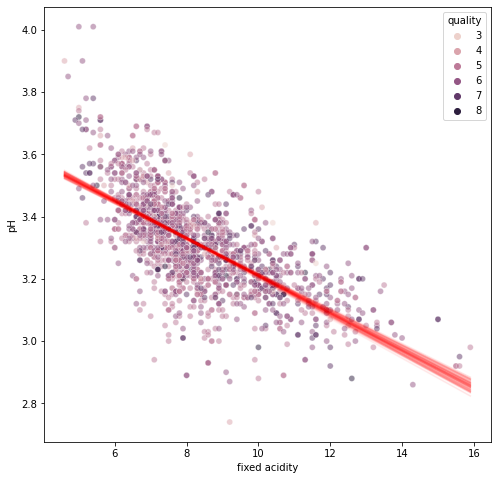

In [135]:
fig, ax = plt.subplots(figsize=(8,8))

ax=sns.scatterplot(ax=ax, data=df, x='fixed acidity', y='pH', hue='quality', alpha=0.5)

# Plot the posterior predictive
xx = np.linspace(np.min(X), np.max(X), 100)

for i in range(100):
    ndx = np.random.randint(0, len(samples_nuts))
    b0, b1 = samples_nuts[ndx]['alpha'], samples_nuts[ndx]['beta']
    z = b0 + b1 * xx 
    ax.plot(xx, z, c="red", alpha=0.05)
    
#ax.plot(xx, 3.8+(-0.06)*xx, c="blue", linewidth=2)
#plt.ylabel("P(failure)")
#plt.xlabel("temperature")
plt.show()



In [125]:
X

array([7.4, 7.8, 7.8, ..., 6.3, 5.9, 6. ])

In [126]:
mean_spp

array([3.3646123 , 3.34244706, 3.34268623, ..., 3.43153117, 3.45695015,
       3.44860068])

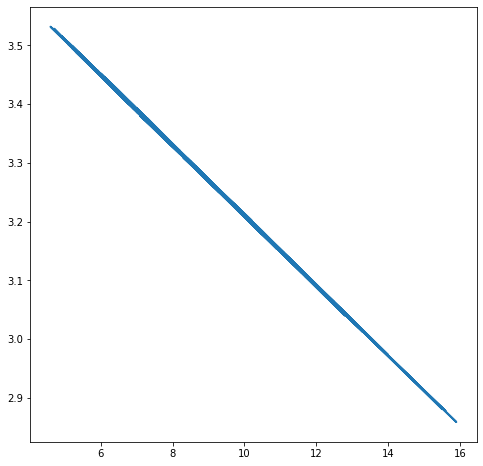

In [124]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(X, mean_spp, linewidth=2)
#ax.fill_between(X, crit_l, crit_u, alpha=0.5)
#sns.scatterplot(ax=ax, data=df, x='fixed acidity', y='pH', hue='quality')

In [108]:
#extract the samples from NUTS sampler

alpha_samples = samples_nuts["alpha"][5000:, None]
beta_samples = samples_nuts["beta"][5000:, None]
sigma_samples = samples_nuts["sigma"][5000:, None] 

In [109]:
alpha_pm = alpha_samples.mean() 
beta_pm = beta_samples.mean()

In [36]:
def abline(axes, slope, intercept):
    """Plot a line from slope and intercept"""
    if axes == None:
        axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

NameError: name 'abline' is not defined

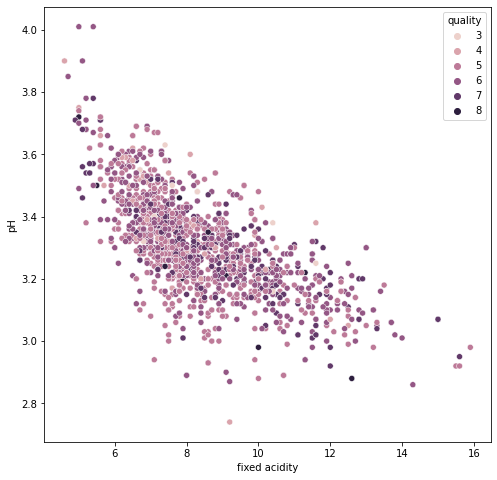

In [111]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(ax=ax, data=df, x='fixed acidity', y='pH', hue='quality')
abline(axes=ax, slope=beta_pm, intercept=alpha_pm)